Check for association between fertilisers across seasons for Cassava using Apriori mining algorithm

In [2]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
cassava=pd.read_excel("Cassava_Yield_Data.xlsx")
cassava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

In [4]:
#subset dataset
cassava2=cassava[["Sesn", "ferT"]]
#view result
cassava2

,Sesn,ferT
0,2,F2150
1,2,F1100
2,2,F3200
3,2,F5300
4,2,F4250
...,...,...
110,2,F1100
111,2,F5300
112,2,F2150
113,2,F4250


In [5]:
#View fertilizer transactions
transactions_cassava = [a[1]['ferT'].tolist() for a in list(cassava2.groupby(['Sesn']))]
#view 
transactions_cassava

[['F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F4250',
  'F5300',
  'F1100',
  'F3200',
  'F2150',
  'F5300',
  'F4250'],
 ['F2150',
  'F1100',
  'F3200',
  'F5300',
  'F4250',
  'F5300',
  'F3200',
  'F4250',
  'F1100',
  'F2150',
  'F4250',
  'F5300',
  'F2150',
  'F3200',
  'F1100',
  'F2150',
  'F1100',
  'F3200',
  'F5300',
  'F4250',
  'F5300',
  'F3200',
  'F4250',
  'F1100',
  'F2150',
  'F4250',
  'F5300',
  'F2150',
  'F3200',
  'F1100',
  'F1100',
  'F5300',
  'F4250',
  'F3200',
  'F2150',
  'F1100'

In [6]:
#Encode the transactions
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions_cassava).transform(transactions_cassava)

In [7]:
te_ary

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [26]:
#Generate the newly transformed dataframe "cassava3"
transactions_cassava = pd.DataFrame(te_ary, columns=te.columns_)
cassava3 = transactions_cassava.describe()
#view result
cassava3

,F1100,F2150,F3200,F4250,F5300
count,2,2,2,2,2
unique,1,1,1,1,1
top,True,True,True,True,True
freq,2,2,2,2,2


In [9]:
cassava3.iloc[0]-cassava3.iloc[3]

F1100    0
F2150    0
F3200    0
F4250    0
F5300    0
dtype: object

In [27]:
f = cassava3.iloc[0]-cassava3.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions_cassava

,F1100,F2150,F3200,F4250,F5300
0,True,True,True,True,True
1,True,True,True,True,True


In [11]:
#Import the apriori libraries and the association rules
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [12]:
#Look for the frequently used fertilizers
#We are using a minimum support value of 10%
freq_items = apriori(transactions_cassava, min_support=0.1, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 5 combinations | Sampling itemset size 54


,support,itemsets
0,1.0,(F1100)
1,1.0,(F2150)
2,1.0,(F3200)
3,1.0,(F4250)
4,1.0,(F5300)
5,1.0,"(F1100, F2150)"
6,1.0,"(F1100, F3200)"


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt 

In [14]:
#Using a minimum support of 10% or 0.1
freq_items = apriori(transactions_cassava, min_support=0.1, use_colnames=True, verbose=1)
freq_items

Processing 5 combinations | Sampling itemset size 54


,support,itemsets
0,1.0,(F1100)
1,1.0,(F2150)
2,1.0,(F3200)
3,1.0,(F4250)
4,1.0,(F5300)
5,1.0,"(F1100, F2150)"
6,1.0,"(F1100, F3200)"
7,1.0,"(F1100, F4250)"
8,1.0,"(F5300, F1100)"
9,1.0,"(F2150, F3200)"


In [15]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))


In [16]:
#Calculate the rules association parameters
rules_cassava = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules_cassava.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(F1100),(F2150),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
1,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
2,(F1100),(F3200),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
3,(F3200),(F1100),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
4,(F1100),(F4250),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
5,(F4250),(F1100),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
6,(F5300),(F1100),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
7,(F1100),(F5300),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
8,(F2150),(F3200),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0
9,(F3200),(F2150),1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0


C:\Users\seth\AppData\Local\Temp\ipykernel_36592\396752599.py:2: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(rules_cassava['lift'], rules_cassava['confidence'], 1)


Text(0.5, 1.0, 'lift vs Confidence')

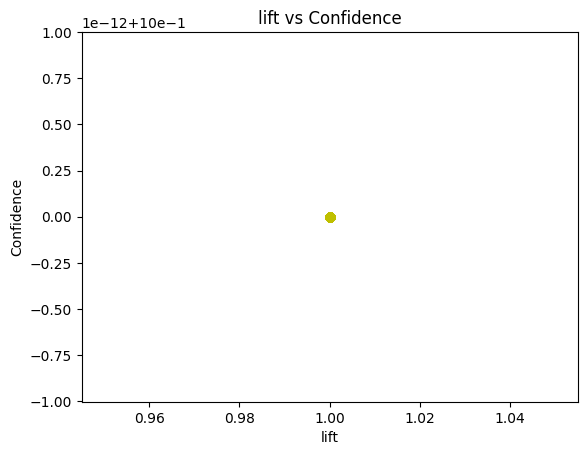

In [17]:
#Plot confidence and lift
fit = np.polyfit(rules_cassava['lift'], rules_cassava['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules_cassava['lift'], rules_cassava['confidence'], 'yo', rules_cassava['lift'], 
fit_fn(rules_cassava['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

Is there an statistically significant association between fertilizer and tillage?

Use Cramér’s V (sometimes referred to as Cramér’s phi and denoted as φc) which is a measure of association between nominal variables (categorical variables with no ranking). The value ranges 0 to 1, where 0 indicates no association and 1 indicates a perfect association.

* Step 1: import association_metrics as am.
* Step 2: Use a lambda function to convert all object columns to categorical columns.
* Step 3: use CramersV( ) method on the dataset.
* Step 4: use .fit( ) method to fit the estimator to compute values.

In [18]:
!pip install association_metrics
import association_metrics as am

In [19]:
#Subset data to include only tillage and fetilizer
cassava4=cassava[["tillage ", "ferT"]]
cassava4

,tillage,ferT
0,conv,F2150
1,conv,F1100
2,conv,F3200
3,conv,F5300
4,conv,F4250
...,...,...
110,conv,F1100
111,conv,F5300
112,conv,F2150
113,conv,F4250


In [20]:
# Convert object columns to Category columns
df = cassava4.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)


In [21]:
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df)

In [22]:
#Generate the cramer's v results
cfit = cramers_v.fit().round(2)
cfit

c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\site-packages\association_metrics\categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
c:\Users\seth\AppData\Local\Programs\Python\Python312\Lib\sit

,tillage,ferT
tillage,1.0,0.0
ferT,0.0,1.0


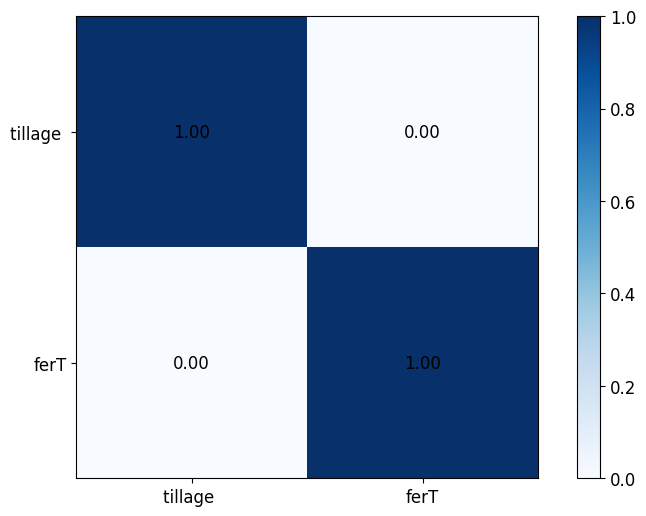

In [23]:
#To generate a pairwise association plot
# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (10, 6))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Setting the axes labels
ax.set_xticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
ax.set_yticks(ticks = range(len(cfit.columns)),
              labels = cfit.columns)
# Setting tick parameters
ax.tick_params(axis = "x", labelsize = 12, labelrotation = 0)
ax.tick_params(axis = "y", labelsize = 12, labelrotation = 0)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 12)

There's no association between tillage and fetilizer

Or use the dython library to generate Cramer's V association results for categorical variables

In [1]:
!pip install dython
import warnings
ignore_warnings = warnings.filterwarnings('ignore')
import dython
from dython.nominal import associations

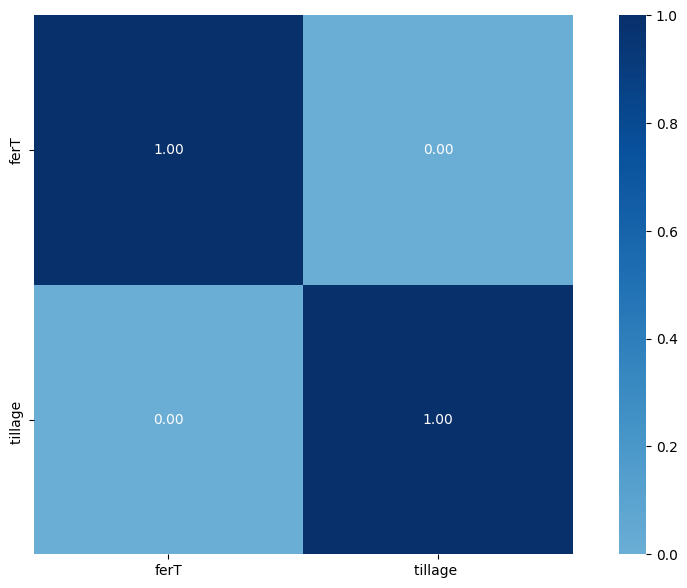

In [25]:
# Convert categorical columns to object columns
df = cassava4.apply(
        lambda x: x.astype("object") if x.dtype == "category" else x)
# Instantiate a figure and axis object
fig, ax = plt.subplots(figsize = (12, 7))
# Estimate and generate Cramer's V association plot
cramers_v = associations(df[["ferT", "tillage "]],
             nom_nom_assoc = 'cramer',
             ax = ax,
             cmap = "Blues")